In [1]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16


In [2]:
def load_labels(start, end, label_path, run_freq, file_format):

    labels = []
    for run_date in pd.date_range(start, end, freq=run_freq[0], closed="left"):
        file_name = os.path.join(label_path, f'model_labels_{run_date.strftime("%Y-%m-%d_%H%M")}.{file_format}')
        if os.path.isfile(file_name):
            if file_format == 'parquet':
                labels.append(pd.read_parquet(file_name))
            elif file_format == 'csv':
                labels.append(pd.read_csv(file_name))
        else:
            continue

    return pd.concat(labels)


"SS1" = "GMM" (Charlie's Labels)

CNN_1 = Ryan's CNN

DNN_1 = Dave A's DNN

Ignore SS2 and SS_2


In [3]:
data = 'wrf'
labels = load_labels("2013-01-01", "2013-12-31", '/glade/scratch/cbecker/HWT_2013/labels', 'daily', 'csv')
labels['Valid_Date'] = pd.to_datetime(labels['Valid_Date'])
labels['Run_Date'] = pd.to_datetime(labels['Run_Date'])
labels = labels.rename(columns={"Valid_Date": "Valid_Datetime", "Run_Date": "Run_Datetime"}, errors="raise")
labels['Valid_Date'] = labels['Valid_Datetime'].dt.date
print(list(labels.columns))


['Valid_Datetime', 'Run_Datetime', 'Forecast_Hour', 'Step_ID', 'Track_ID', 'Duration', 'Centroid_Lon', 'Centroid_Lat', 'UP_HELI_MAX_max', 'USHR6-potential_mean', 'VSHR6-potential_mean', 'MLCAPE-potential_max', 'MLCAPE-potential_mean', 'SS_2_cluster_0_prob', 'SS_2_cluster_1_prob', 'SS_2_cluster_2_prob', 'SS_2_cluster_3_prob', 'SS_2_cluster_4_prob', 'SS_2_cluster_5_prob', 'SS_2_cluster_6_prob', 'SS_2_cluster_7_prob', 'SS_2_cluster_8_prob', 'SS_2_cluster_9_prob', 'SS_2_cluster_10_prob', 'SS_2_cluster_11_prob', 'SS_2_cluster_12_prob', 'SS_2_cluster_13_prob', 'SS_2_cluster_14_prob', 'SS_2_cluster_15_prob', 'SS_2_cluster_16_prob', 'SS_2_cluster_17_prob', 'SS_2_cluster_18_prob', 'SS_2_cluster_19_prob', 'SS_2_cluster_20_prob', 'SS_2_cluster_21_prob', 'SS_2_cluster_22_prob', 'SS_2_cluster_23_prob', 'SS_2_cluster_24_prob', 'SS_2_QLCS_prob', 'SS_2_Supercell_prob', 'SS_2_Disorganized_prob', 'SS_2_label_prob', 'SS_2_label', 'SS1_cluster_0_prob', 'SS1_cluster_1_prob', 'SS1_cluster_2_prob', 'SS1_clus

In [4]:
label_to_int = {"Disorganized": 0,
                "QLCS": 1,
                "Supercell": 2}

labels ['SS1_int'] = labels['SS1_label'].map(label_to_int)
labels ['CNN_1_int'] = labels['CNN_1_label'].map(label_to_int)


In [5]:
columns = ['Valid_Datetime',
           'Valid_Date',
           'Run_Datetime',
           'Forecast_Hour',
           'Step_ID',
           'Track_ID',
           'Duration',
           'Centroid_Lon',
           'Centroid_Lat',
           'UP_HELI_MAX_max',
           'USHR6-potential_mean',
           'VSHR6-potential_mean',
           'MLCAPE-potential_max',
           'MLCAPE-potential_mean',
           'SS1_label',
           'SS1_int',
           'CNN_1_label',
           'CNN_1_int']

labels = labels[columns]
labels.head()


,Valid_Datetime,Valid_Date,Run_Datetime,Forecast_Hour,Step_ID,Track_ID,Duration,Centroid_Lon,Centroid_Lat,UP_HELI_MAX_max,USHR6-potential_mean,VSHR6-potential_mean,MLCAPE-potential_max,MLCAPE-potential_mean,SS1_label,SS1_int,CNN_1_label,CNN_1_int
0,2013-01-29 12:00:00,2013-01-29,2013-01-29,12,d01_REFL_COM_20130129-0000_12_13_000_00,d01_REFL_COM_20130129-0000_12_13_000,1,-97.22364,36.24175,64.52087,24.07942,28.10964,1094.50598,930.83472,Supercell,2,Supercell,2
1,2013-01-29 13:00:00,2013-01-29,2013-01-29,13,d01_REFL_COM_20130129-0000_12_13_000_01,d01_REFL_COM_20130129-0000_12_13_000,2,-96.41878,36.91128,58.45045,23.49971,30.40690,1340.13904,1060.18909,Disorganized,0,QLCS,1
2,2013-01-29 12:00:00,2013-01-29,2013-01-29,12,d01_REFL_COM_20130129-0000_12_14_001_00,d01_REFL_COM_20130129-0000_12_14_001,1,-88.61043,40.26394,8.94630,22.87173,6.26882,72.39502,36.25229,Disorganized,0,Disorganized,0
3,2013-01-29 13:00:00,2013-01-29,2013-01-29,13,d01_REFL_COM_20130129-0000_12_14_001_01,d01_REFL_COM_20130129-0000_12_14_001,2,-87.64117,40.68820,8.81345,23.28363,5.57460,23.99976,4.98572,Disorganized,0,Disorganized,0
4,2013-01-29 14:00:00,2013-01-29,2013-01-29,14,d01_REFL_COM_20130129-0000_12_14_001_02,d01_REFL_COM_20130129-0000_12_14_001,3,-87.99344,40.69169,4.24018,18.54346,8.04036,14.63422,4.97173,Disorganized,0,Disorganized,0


In [6]:
model_to_label = {"SS1": "GMM",
                  "CNN_1": "CNN"}


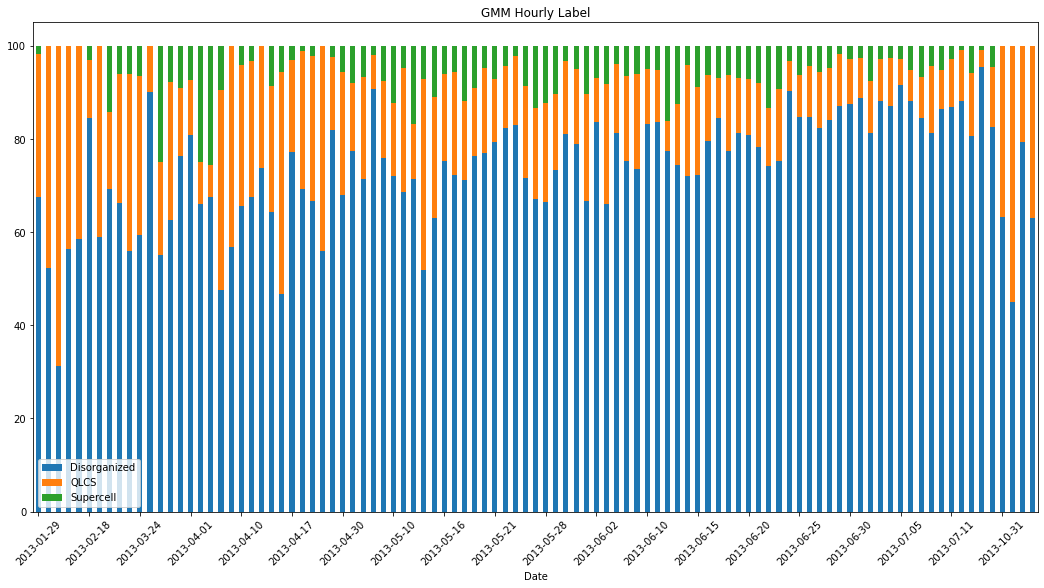

In [7]:
model = "SS1"

fig, ax = plt.subplots()
labels.groupby(['Valid_Date', f'{model}_int']).size().unstack().fillna(0).apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar', stacked=True, figsize=(18,9), ax=ax)
ax.legend(['Disorganized', 'QLCS', 'Supercell'])
ax.set_xlabel('Date')
plt.title(f'{model_to_label[model]} Hourly Label')
plt.xticks(rotation = 45)
plt.locator_params(axis='x', nbins=20)
plt.savefig(f"figures/{data}_label_by_hour_{model_to_label[model].lower()}.png", dpi=300)
plt.show()


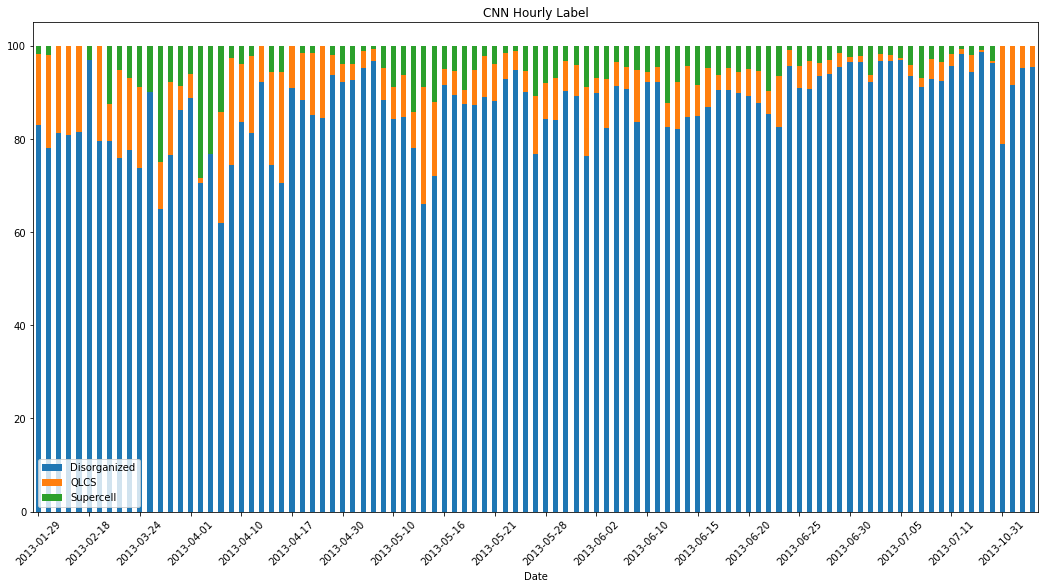

In [8]:
model = "CNN_1"

fig, ax = plt.subplots()
labels.groupby(['Valid_Date', f'{model}_int']).size().unstack().fillna(0).apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar', stacked=True, figsize=(18,9), ax=ax)
ax.legend(['Disorganized', 'QLCS', 'Supercell'])
ax.set_xlabel('Date')
plt.title(f'{model_to_label[model]} Hourly Label')
plt.xticks(rotation = 45)
plt.locator_params(axis='x', nbins=20)
plt.savefig(f"figures/{data}_label_by_hour_{model_to_label[model].lower()}.png", dpi=300)
plt.show()


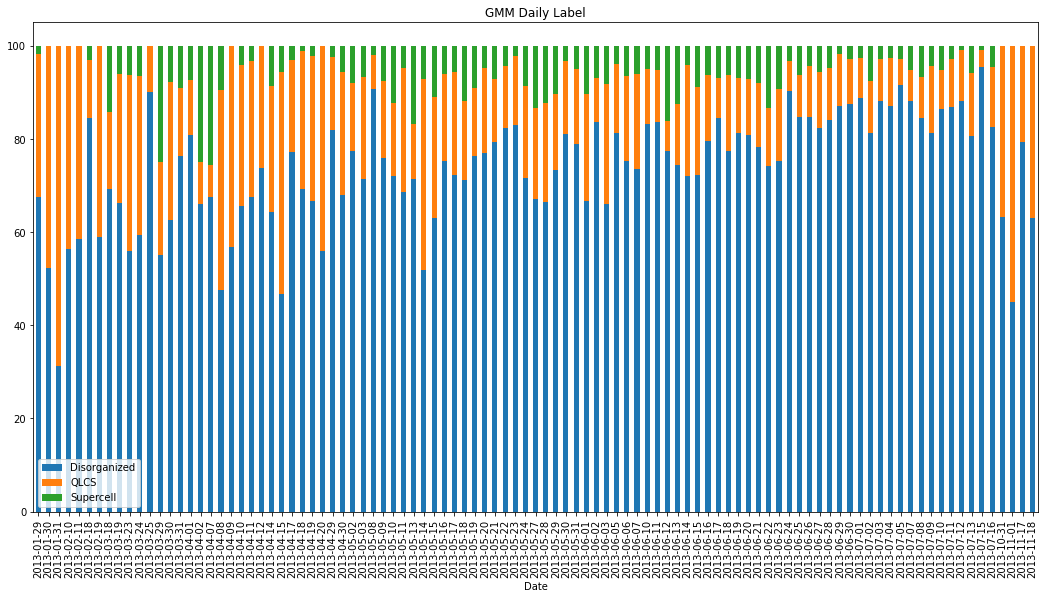

In [9]:
model = "SS1"

fig, ax = plt.subplots()
labels.groupby(['Valid_Date',f'{model}_int']).size().unstack().fillna(0).apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar', stacked=True, figsize=(18,9), ax=ax)
ax.legend(['Disorganized', 'QLCS', 'Supercell'])
ax.set_xlabel('Date')
plt.title(f'{model_to_label[model]} Daily Label')
# plt.locator_params(axis='x', nbins=labels.groupby(['Valid_Date',f'{model}_int']).size().unstack().shape[0]//2)
plt.savefig(f"figures/{data}_label_by_date_{model_to_label[model].lower()}.png", dpi=300, bbox_inches='tight')
plt.show()


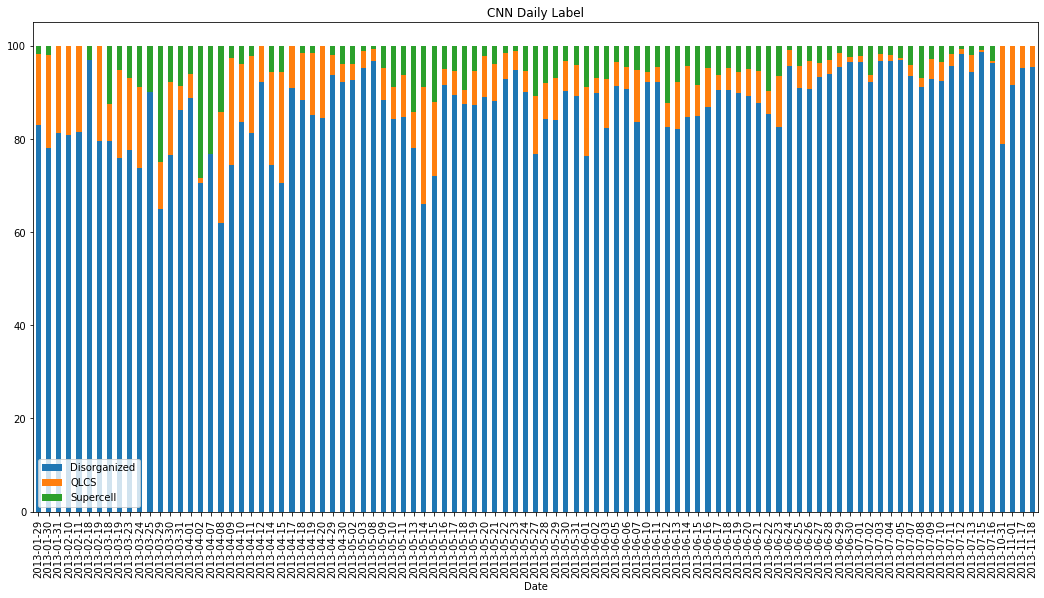

In [10]:
model = "CNN_1"

fig, ax = plt.subplots()
labels.groupby(['Valid_Date',f'{model}_int']).size().unstack().fillna(0).apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar', stacked=True, figsize=(18,9), ax=ax)
ax.legend(['Disorganized', 'QLCS', 'Supercell'])
ax.set_xlabel('Date')
plt.title(f'{model_to_label[model]} Daily Label')
# plt.locator_params(axis='x', nbins=labels.groupby(['Valid_Date',f'{model}_int']).size().unstack().shape[0]//2)
plt.savefig(f"figures/{data}_label_by_date_{model_to_label[model].lower()}.png", dpi=300, bbox_inches='tight')
plt.show()


/glade/work/ggantos/miniconda2/envs/holo_torch/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


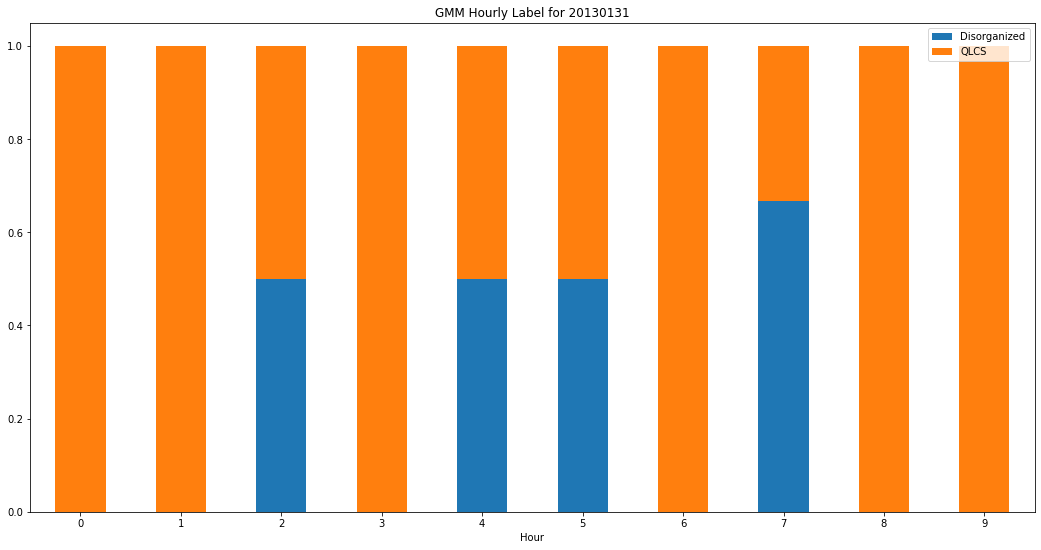

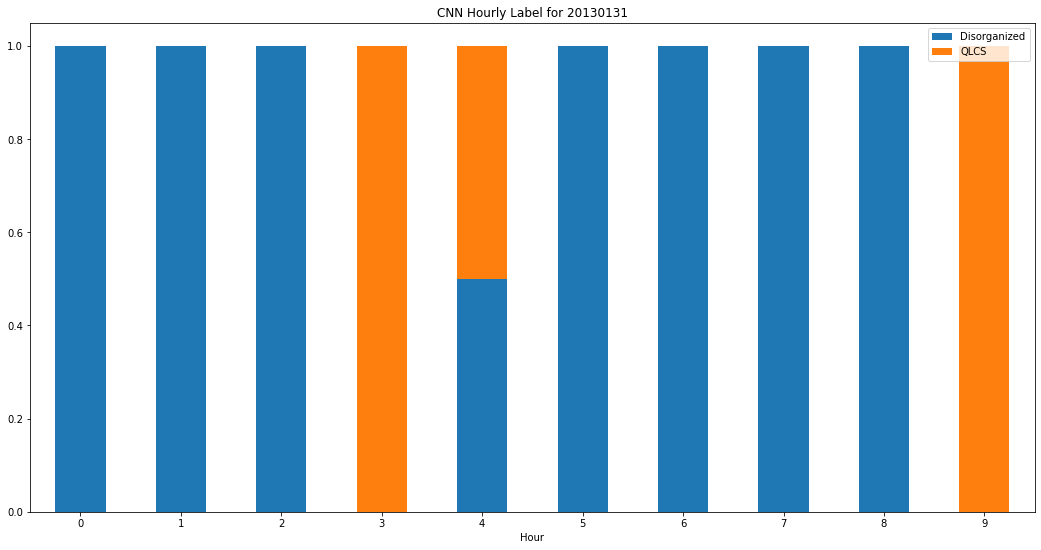

In [11]:
date = '20130131'

for model in ['SS1', 'CNN_1']:
    fig, ax = plt.subplots()
    fig.canvas.draw()
    labels[labels['Valid_Date'] == datetime.strptime(date, '%Y%m%d').date()].groupby(['Valid_Datetime',f'{model}_int']).size().unstack().fillna(0).apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar', stacked=True, figsize=(18,9), ax=ax)
    labels_x = [datetime.strptime(item.get_text(), '%Y-%m-%d %H:%M:%S').hour for item in ax.get_xticklabels()]
    labels_y = [item.get_text() for item in ax.get_yticklabels()]
    ax.set_yticklabels(labels_y)
    ax.set_xticklabels(labels_x, rotation = 0)
    ax.legend(['Disorganized', 'QLCS', 'Supercell'])
    ax.set_xlabel('Hour')
    plt.title(f'{model_to_label[model]} Hourly Label for {date}')
    plt.savefig(f"figures/{data}_label_by_hour_{model_to_label[model].lower()}_{date}.png", dpi=300, bbox_inches='tight')
    plt.show()


/glade/work/ggantos/miniconda2/envs/holo_torch/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


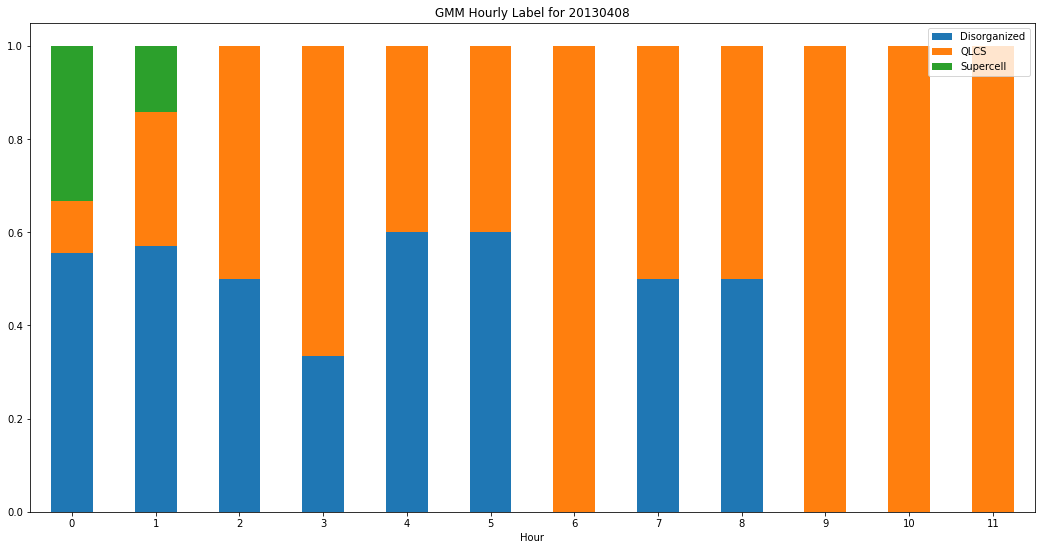

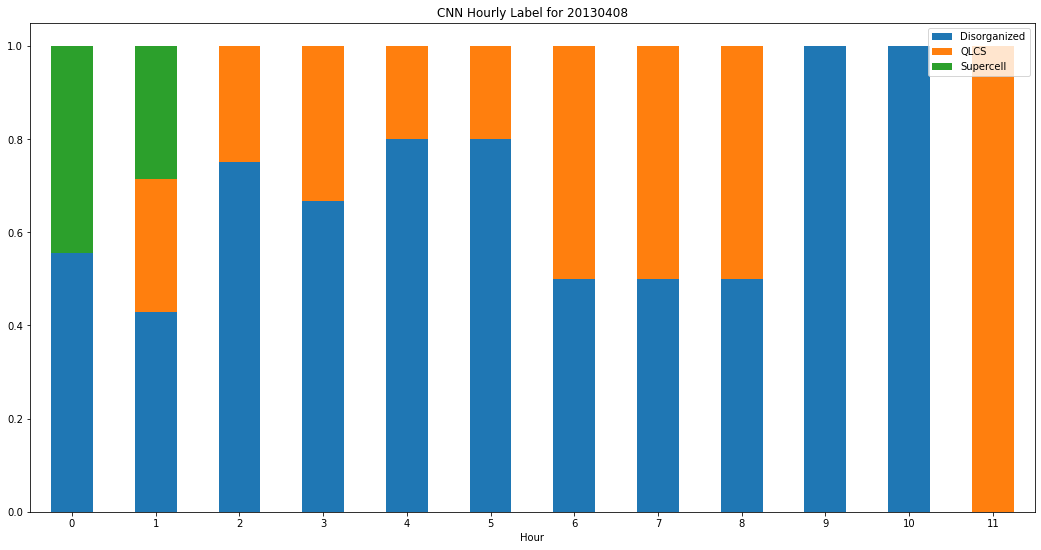

In [12]:
date = '20130408'

for model in ['SS1', 'CNN_1']:
    fig, ax = plt.subplots()
    fig.canvas.draw()
    labels[labels['Valid_Date'] == datetime.strptime(date, '%Y%m%d').date()].groupby(['Valid_Datetime',f'{model}_int']).size().unstack().fillna(0).apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar', stacked=True, figsize=(18,9), ax=ax)
    labels_x = [datetime.strptime(item.get_text(), '%Y-%m-%d %H:%M:%S').hour for item in ax.get_xticklabels()]
    labels_y = [item.get_text() for item in ax.get_yticklabels()]
    ax.set_yticklabels(labels_y)
    ax.set_xticklabels(labels_x, rotation = 0)
    ax.legend(['Disorganized', 'QLCS', 'Supercell'])
    ax.set_xlabel('Hour')
    plt.title(f'{model_to_label[model]} Hourly Label for {date}')
    plt.savefig(f"figures/{data}_label_by_hour_{model_to_label[model].lower()}_{date}.png", dpi=300, bbox_inches='tight')
    plt.show()
    